In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

import sys

sys.path.append("../")
import loss_functions as ls
import utils as ut
from models import Model
from layers import Linear, Flatten
from activation_functions import Sigmoid, Tanh, ReLU, LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tqdm import tqdm
from collections import Counter

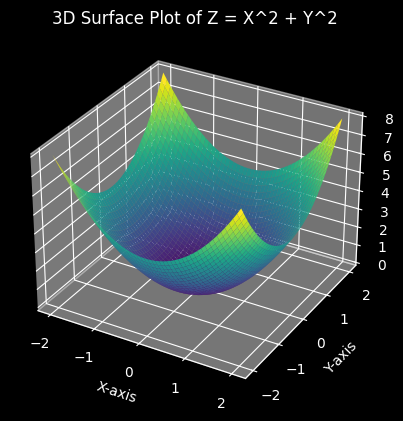

Shapes: X: (50, 50), Y: (50, 50), Z: (50, 50)
Shapes: X: (2500, 2), y: (2500,)
n_samples -> 1750
n_features -> 2
Shape of X_train -> (1750, 2)
Shape of y_train -> (1750, 1)
First 5 samples of X_train: [[0.04081633 0.63265306]
 [0.81632653 0.91836735]
 [0.97959184 0.55102041]
 [0.51020408 0.71428571]
 [1.         0.91836735]]
First 5 samples of y_train: [[3.65514369]
 [4.40149938]
 [3.72178259]
 [0.73635985]
 [6.80049979]]


In [14]:
# z = x**2 + y**2 3D Paraboloid regression

# Create a 2D grid of points in the range [-2, 2]
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# Calculate Z using the surface formula
Z = X**2 + Y**2  # shape: (50, 50)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("3D Surface Plot of Z = X^2 + Y^2")
plt.show()

print(f"Shapes: X: {X.shape}, Y: {Y.shape}, Z: {Z.shape}")

X = np.stack([X.ravel(), Y.ravel()], axis=1)
y = Z.ravel()
print(f"Shapes: X: {X.shape}, y: {y.shape}")

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=0.9, random_state=42
)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"n_samples -> {X_train.shape[0]}")
print(f"n_features -> {X_train.shape[1]}")
print(f"Shape of X_train -> {X_train.shape}")
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(f"Shape of y_train -> {y_train.shape}")

print("First 5 samples of X_train:", X_train[:5])
print("First 5 samples of y_train:", y_train[:5])

In [16]:
model = Model(ls.mse)
model.add(Linear(2, 12, ReLU()))  # Increase neurons and use Tanh
model.add(Linear(12, 24, ReLU()))
model.add(Linear(24, 12, ReLU()))
model.add(Linear(12, 1, None))
print(model)

loss, train_predictions, test_predictions = model.fit(
    (X_train, y_train),
    100,
    0.1,
    batch_size=32,
    logging_predictions=True,
    validation_data=(X_val, y_val),
)

Linear Layer (in 2, out 12), (activation relu)
Linear Layer (in 12, out 24), (activation relu)
Linear Layer (in 24, out 12), (activation relu)
Linear Layer (in 12, out 1), (activation None)
Training epoch 0
Epoch 0 loss -> 113.16271699703043
Validation loss -> 0.0
Training epoch 1
Epoch 1 loss -> 83.13613636928034
Validation loss -> 0.0
Training epoch 2
Epoch 2 loss -> 75.47070708504805
Validation loss -> 0.0
Training epoch 3
Epoch 3 loss -> 68.79083994280583
Validation loss -> 0.0
Training epoch 4
Epoch 4 loss -> 64.37015726085431
Validation loss -> 0.0
Training epoch 5
Epoch 5 loss -> 60.4675498542429
Validation loss -> 0.0
Training epoch 6
Epoch 6 loss -> 58.0598596852934
Validation loss -> 0.0
Training epoch 7
Epoch 7 loss -> 56.872117454993806
Validation loss -> 0.0
Training epoch 8
Epoch 8 loss -> 56.206562024757694
Validation loss -> 0.0
Training epoch 9
Epoch 9 loss -> 54.525469146709455
Validation loss -> 0.0
Training epoch 10
Epoch 10 loss -> 53.818449112459575
Validation los

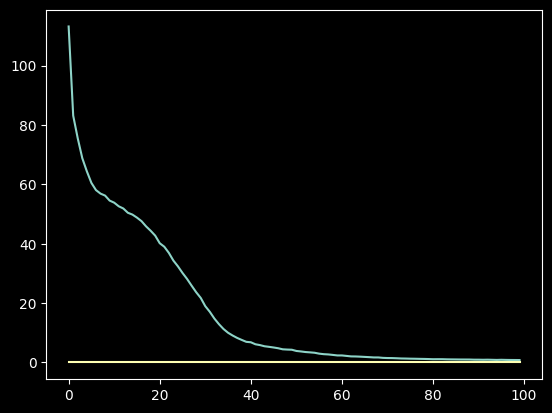

In [17]:
plt.plot(loss["train"], label="Train Loss")
plt.plot(loss["val"], label="Validation Loss")

In [18]:
# Test the model
predictions = model.predict(X_test)
# get loss
test_loss = ls.mse(y_test, predictions)
print(f"Test Loss: {test_loss}")

Test Loss: 0.03324457268534404


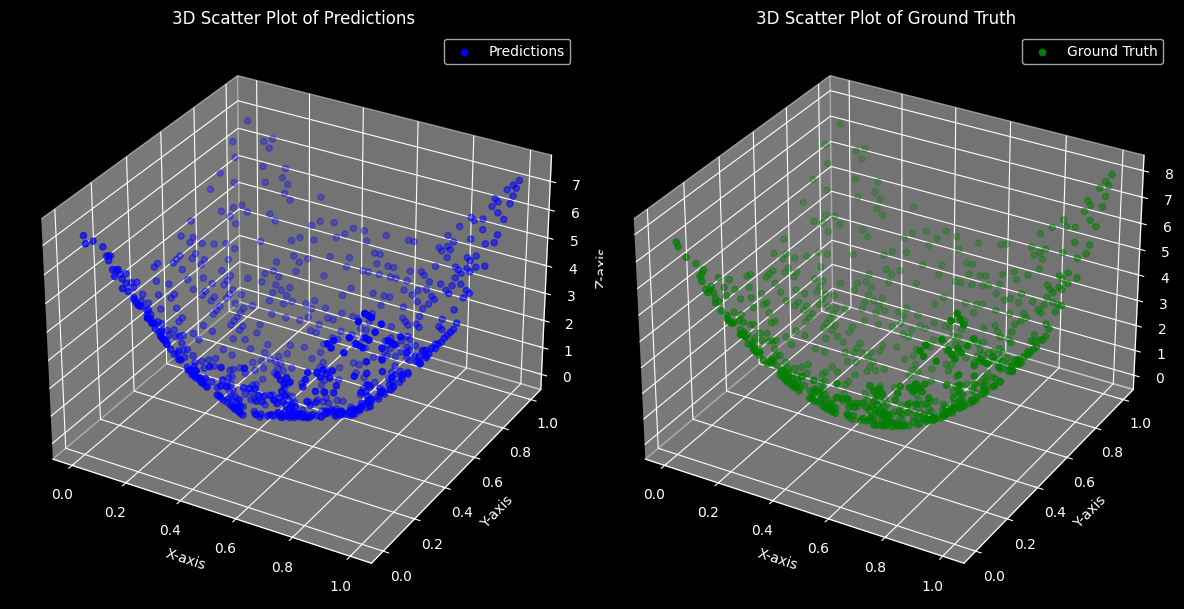

In [ ]:
X_test_unraveled = X_test[:, 0]
Y_test_unraveled = X_test[:, 1]
Z_predictions = predictions.ravel()
Z_test_unraveled = y_test.ravel()

# Plot the unraveled data on 2 subfigures
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(
    X_test_unraveled,
    Y_test_unraveled,
    Z_predictions,
    color="blue",
    label="Predictions",
)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
ax1.set_title("3D Scatter Plot of Predictions")
ax1.legend()

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(
    X_test_unraveled,
    Y_test_unraveled,
    Z_test_unraveled,
    color="green",
    label="Ground Truth",
)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
ax2.set_title("3D Scatter Plot of Ground Truth")
ax2.legend()

plt.tight_layout()
plt.show()